<a href="https://colab.research.google.com/github/mwinzie/Autolib2-Project/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_Agnes_Mwinzi_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem
The objective of this project is to investigate a claim about the number of blue cars used in Autolib electric car-sharing service company.

In [0]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import ttest_1samp
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

%matplotlib inline

sns.set()

from sklearn.cluster import KMeans
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset Dictionary

In [0]:
#loading the autolib data dictionary from the url http://bit.ly/DSCoreAutolibDatasetGlossary

autodict = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

In [0]:
#previewing the contents in the data dictionary

autodict

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


# Loading the Dataset

### Loading the Autolib Dataset

In [0]:
#loading the autolib dataset from the URL http://bit.ly/DSCoreAutolibDataset and creating a dataframe called auto
auto = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# Reading the Dataset

In [0]:
#previewing the number of rows and columns that are in the dataset
print((auto.shape[0]), 'rows')
print(auto.shape[1], 'columns')

16085 rows
13 columns


In [0]:
#previewing the first five records in the dataset to see what the data set contains
auto.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#previewing the bottom five records in the dataset
auto.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
auto.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset
While tidying the dataset, I shall check for missing data, check for validity by identifying irrelevant data that may not be needed, check for any syntax errors, outliers and also check for data completeness and uniformity.

In [0]:
#checking the column names
auto.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [119]:
#converting all the column names to lower case and replacing any spaces ' ', with '_'
auto.columns = auto.columns.str.strip().str.replace(' ','_').str.lower()
#previewing the column names to ensure the changes have been effected
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
#converting the date column to time data type
auto['date'] = pd.to_datetime(auto['date'])
# Set the datetime column as the index
auto.index = auto['date'] 


In [0]:
auto.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
date,,,,,,,,,,,,,
2018-01-01,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
2018-01-02,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2018-01-03,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
2018-01-04,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
2018-01-05,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [121]:
# Checking duplicate rows except first occurrence based on all columns in the data set
duplicates = auto[auto.duplicated()]
len(duplicates)

#there is no presence of any duplicated values

0

In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

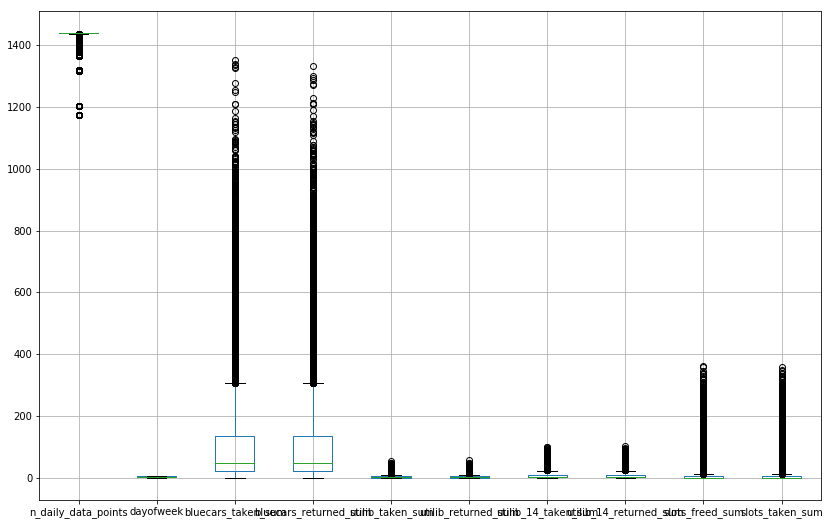

In [0]:
#checking the dataset for any outliers
#plots all the outliers for all numeric values columns
col = auto[['date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']]
col.boxplot(figsize = (14,9))
plt.show()

#most of the columns seem to have outliers but i shall keep them as they may be crucial to the model

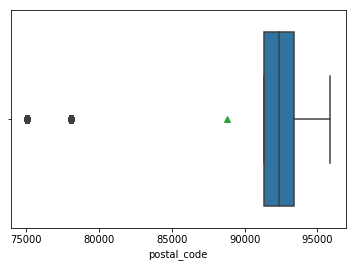

In [0]:
#boxplot for the postal code column
sns.boxplot(auto['postal_code'], showmeans = True)

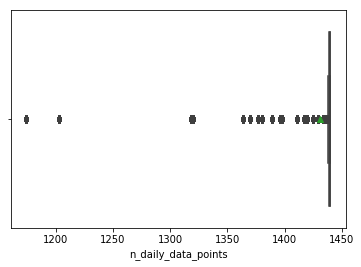

In [0]:
#boxplot for the daily data points column
sns.boxplot(auto['n_daily_data_points'], showmeans = True)
#the data points column seems to have many outliers but i shall keep them for my model

In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

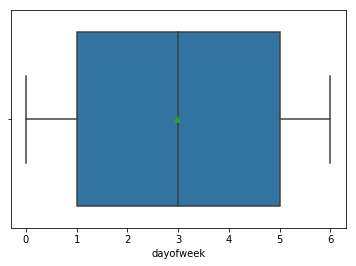

In [0]:
sns.boxplot(auto['dayofweek'], showmeans = True)
#the dayofweek column does not present any outliers

In [0]:
#checking the data set for any null values
auto.isnull().sum()
#the data set does not contain any null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [0]:
#iterating through all columns for unique values in the dataset
for i in auto.columns:
  #to print a line in between the columns
  print('\n')
  print(auto[i].unique())



[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['2018-01-01T00:00:00.000000000' '2018-01-02T00:00:00.000000000'
 '2018-01-03T00:00:00.000000000' '2018-01-04T00:00:00.000000000'
 '2018-01-05T00:00:00.000000000' '2018-01-06T00:00:00.000000000'
 '2018-01-07T00:00:00.000000000' '2018-01-08T00:00:00.000000000'
 '2018-01-09T00:00:00.000000000' '2018-01-10T00:00:00.000000000'
 '2018-01-11T00:00:00.000000000' '201

# Univariate Analysis

In [0]:
#measures of central tendency for the different variables in the data
#means of various variableswith numeric datatype
auto[auto.columns[5:12]].mean()
#this shows the avarage of the variables in the datset

bluecars_taken_sum        125.926951
bluecars_returned_sum     125.912714
utilib_taken_sum            3.698290
utilib_returned_sum         3.699099
utilib_14_taken_sum         8.600560
utilib_14_returned_sum      8.599192
slots_freed_sum            22.629033
dtype: float64

In [0]:
#median of the numeric variables
#returns the middle value of the variable
auto[auto.columns[5:12]].median()


bluecars_taken_sum        46.0
bluecars_returned_sum     46.0
utilib_taken_sum           1.0
utilib_returned_sum        1.0
utilib_14_taken_sum        3.0
utilib_14_returned_sum     3.0
slots_freed_sum            0.0
dtype: float64

In [0]:
#mode of the numeric variables
#returns the most frequent value
auto[auto.columns[5:12]].mode()

,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum
0,12,13,0,0,0,0,0


In [0]:
#the function shows the measures of central tendencies and location for the dataset
auto.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## Frequency Tables

In [0]:
#Frequency tables of the dataset using cross tab between country and has a bank account column

frequency = pd.crosstab(index=auto["bluecars_taken_sum"], columns=[auto["dayofweek"]],margins = True)
frequency.tail()

#shows the total number of bluecars taken for each day of the week

dayofweek,0,1,2,3,4,5,6,All
bluecars_taken_sum,,,,,,,,
1330,0,0,0,0,0,1,0,1
1335,0,0,0,0,0,1,0,1
1338,0,0,0,0,0,1,0,1
1352,0,0,0,0,0,1,0,1
All,2374,2363,2268,2268,2271,2267,2274,16085


Monday is the has the highest turn over of the blue cars with 2374 blue cars taken while Saturday has the lowest with 2267 blue cars

In [0]:
frequency = pd.crosstab(index=auto["bluecars_returned_sum"], columns=[auto["dayofweek"]],margins = True)
frequency.tail()


dayofweek,0,1,2,3,4,5,6,All
bluecars_returned_sum,,,,,,,,
1287,0,0,0,0,0,1,0,1
1294,0,0,0,0,0,1,0,1
1300,0,0,0,0,0,1,0,1
1332,0,0,0,0,0,1,0,1
All,2374,2363,2268,2268,2271,2267,2274,16085


The number of blue cars taken during the week are similar to the number of blue cars returned during the week.

In [0]:
#Frequency tables of the dataset using cross tab between country and has a bank account column

frequency = pd.crosstab(index=auto["day_type"], columns=[auto["n_daily_data_points"]],margins = True)
frequency


n_daily_data_points,1174,1203,1318,1320,1364,1370,1377,1380,1389,1396,1398,1411,1417,1420,1425,1429,1434,1435,1436,1437,1438,1439,1440,All
day_type,,,,,,,,,,,,,,,,,,,,,,,,
weekday,104,103,0,103,103,94,102,0,103,0,104,104,206,103,207,104,207,104,104,308,516,2269,6496,11544
weekend,0,0,103,0,0,0,0,103,0,98,0,0,0,0,0,0,0,0,0,103,207,310,3617,4541
All,104,103,103,103,103,94,102,103,103,98,104,104,206,103,207,104,207,104,104,411,723,2579,10113,16085


The weekday has many daily data points of 11544 comapred to the weekend which has 4541 data points. Most traffic is during the week days.

## Bar Charts, Pie Charts and Histograms

Text(0.5, 1.0, 'Utilib Cars Taken')

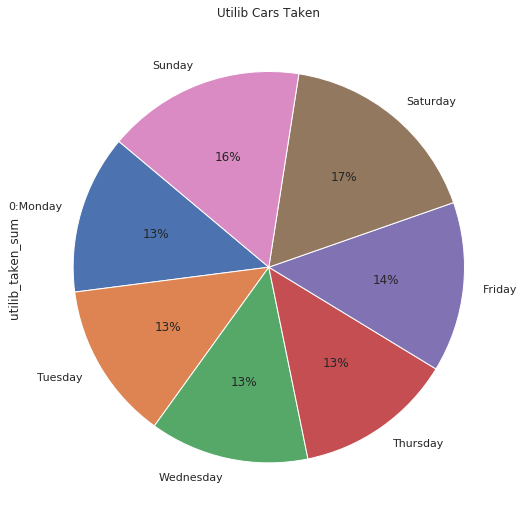

In [0]:
#plotting the pie chart for Utilib cars taken
labels = '0:Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
auto.groupby('dayofweek')['utilib_taken_sum'].sum().plot.pie(labels = labels, autopct = '%1.0f%%', startangle = 140, figsize = (16.8,9))
plt.title('Utilib Cars Taken')

Saturday has the most as most Utilib cars are taken, at 17%. Followed by sunday at 16%. Most activity can be seen is high during the weekend as compared to during the weekdays

Text(0.5, 1.0, 'Utilib Cars Returned')

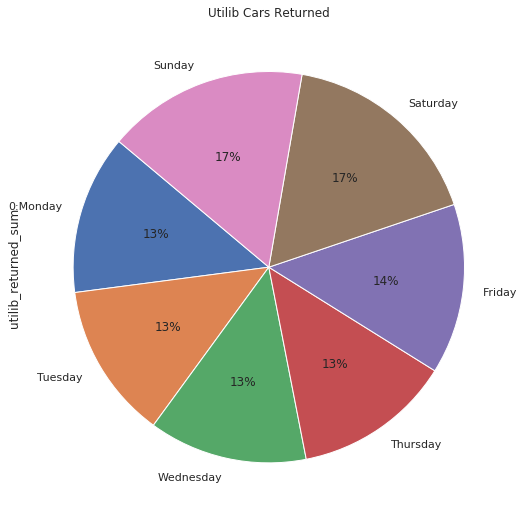

In [0]:
#plotting pie chart of Utilib cars returned
labels = '0:Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
auto.groupby('dayofweek')['utilib_returned_sum'].sum().plot.pie(labels = labels, autopct = '%1.0f%%', startangle = 140, figsize = (16.8,9))
plt.title('Utilib Cars Returned')

The same trend is seen to be the same when it comes to returning the utilib cars with the weekend having the highest activity, which could mean cars are taken and returned the same day.

Text(0.5, 0, 'Taken Utilib Cars')

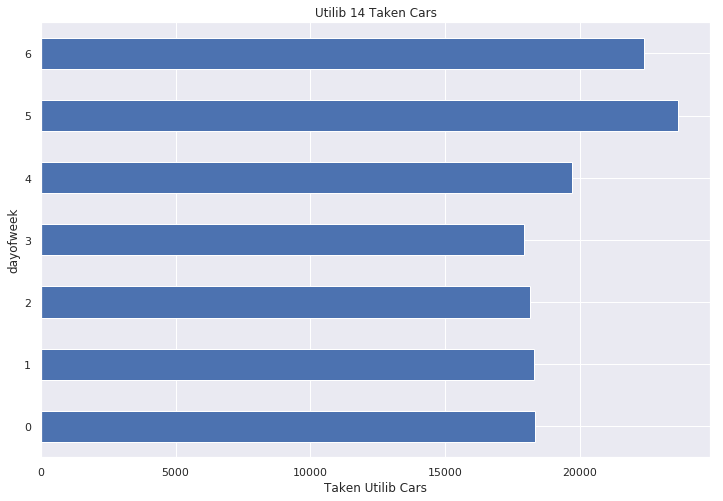

In [0]:
#plotting the Utilib 14 taken cars usage
auto.groupby('dayofweek')['utilib_14_taken_sum'].sum().plot(kind='barh')
plt.title('Utilib 14 Taken Cars')
plt.xlabel('Taken Utilib Cars')

#more utilib 14 cars are taken as from Friday to Sunday with Saturday having the most activity.
#Friday is the most active weekday for taking the utilib 14 cars

Text(0.5, 0, 'Days of the Week')

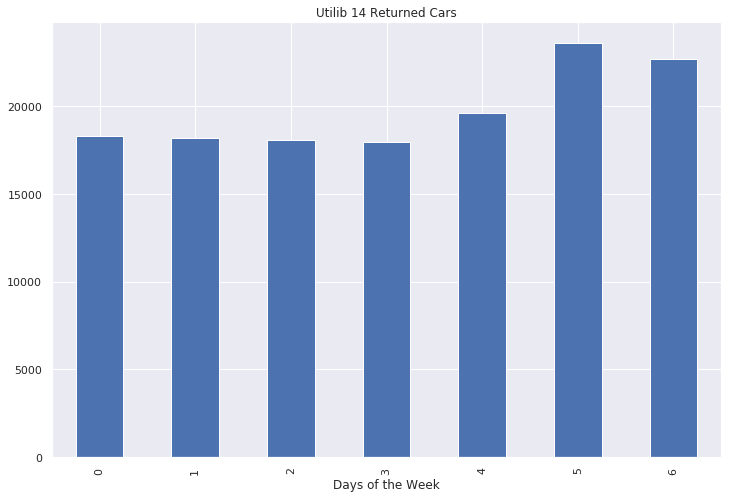

In [0]:
#plotting the Utilib 14 taken cars usage
auto.groupby('dayofweek')['utilib_14_returned_sum'].sum().plot(kind='bar')
plt.title('Utilib 14 Returned Cars')
plt.xlabel('Days of the Week')

#Saturday is the most busiest day for Returning the cars same as taking the cars.

Weekends have high activity compared to the weekdays for the Utilib 14 type of cars. Same trend can be seen for all types of cars with the weekend being busy compared to weekdays

Text(0.5, 1.0, 'Free Slots')

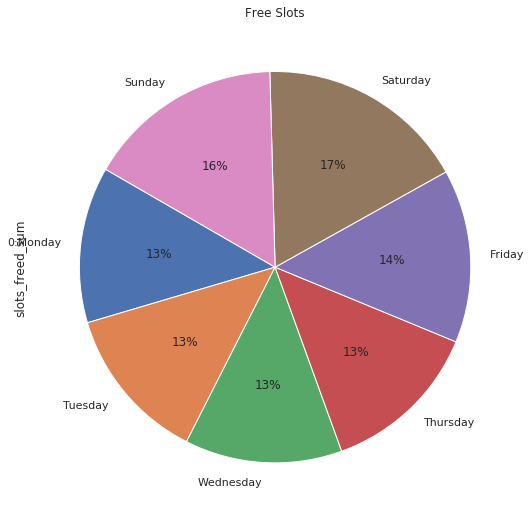

In [0]:
#plotting the pie chart for Slots Freed variable
labels = '0:Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
auto.groupby('dayofweek')['slots_freed_sum'].sum().plot.pie(labels = labels, autopct = '%1.0f%%', startangle = 150, figsize = (16.8,9))
plt.title('Free Slots')

The weekend seems to have lots of activity with Saturday having 17% and Sunday 16%. During the week activity seems to be the same across the board.

Text(0.5, 0, 'Days of the Week')

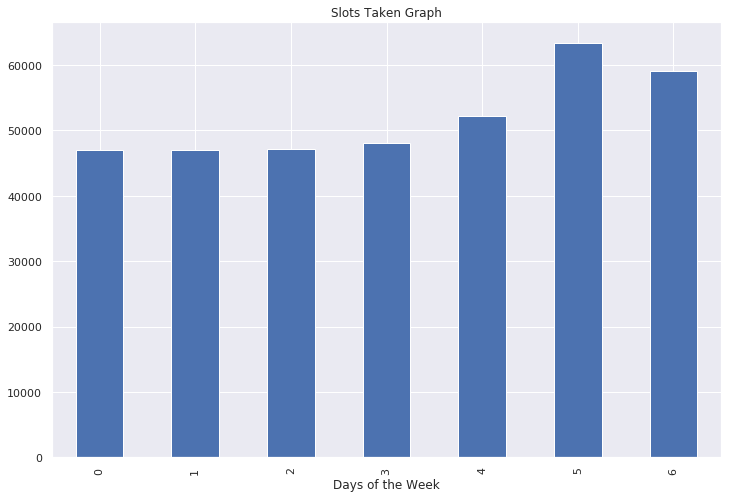

In [0]:
#plotting a bar graph for the Slots Taken variable
auto.groupby('dayofweek')['slots_taken_sum'].sum().plot(kind='bar')
plt.title('Slots Taken Graph')
plt.xlabel('Days of the Week')

Still the same trend can be seen inn the slots taken graph. Seems when cars are returned they are taken at the same time.

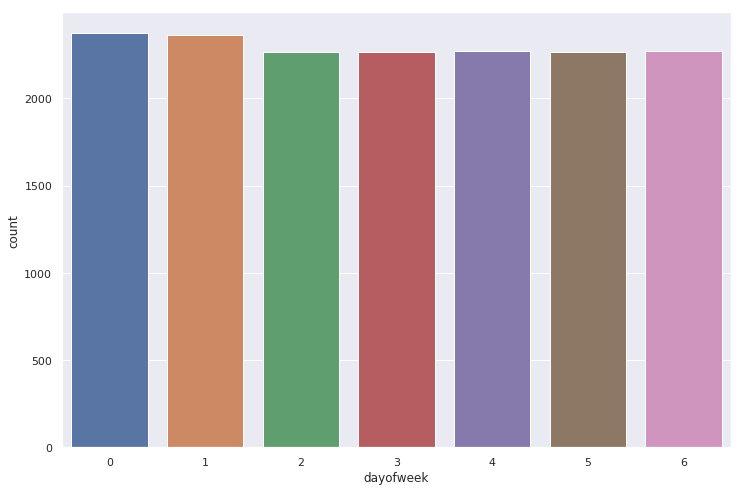

In [0]:
#plotting postal code bar graph
sns.set(rc={'figure.figsize':(12,8)})

sns.countplot(x='dayofweek',data=auto)

#monday and tuesday seem to have more traffic compared to the rest of the week

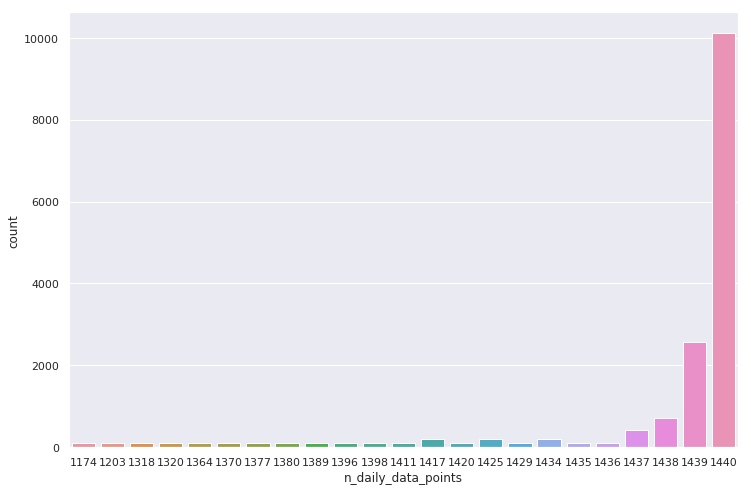

In [0]:
#daily data points box plot
sns.countplot(x = 'n_daily_data_points', data = auto)

Data point 1440 seems to have the highest traffic in the amount of blue cars followed by 1439 but the margins are huge. 

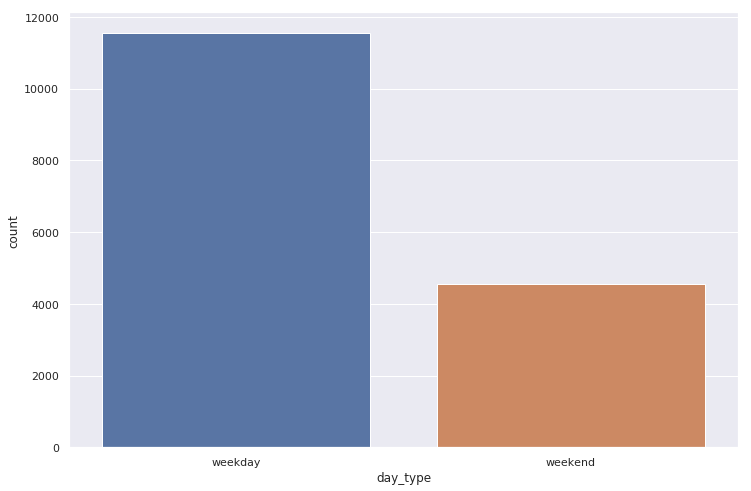

In [0]:
sns.countplot(x='day_type',y= ata=auto)

Weekdays has more blue car usage of the various types compared to the weekend.

In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
#checking the distribution of the taken blue cars on a Monthly basis
monthly_cars_data = auto.bluecars_taken_sum.resample('M').sum().sort_values(ascending = False)
monthly_cars_data
#from the output, the data is distributed between six months. From the six months, March has the most number of blue cars taken.
#June is the least with number of cars taken.

date
2018-03-31    405231
2018-01-31    403174
2018-04-30    385103
2018-02-28    309708
2018-05-31    264814
2018-06-30    257505
Name: bluecars_taken_sum, dtype: int64

In [0]:
monthly_cars = auto.bluecars_returned_sum.resample('M').sum().sort_values(ascending = False)
monthly_cars

#same trend can be seen in the number of blue cars returned with March being highest and June being the least

date
2018-03-31    405480
2018-01-31    403301
2018-04-30    384811
2018-02-28    309449
2018-05-31    264499
2018-06-30    257766
Name: bluecars_returned_sum, dtype: int64

In [0]:
#checking for existence outliers using kurtosis
auto.kurt()

#postal code and day of the week seem to have distribution less than 0 meaning the distribution is heavy tailed (Platykurtic)
#the rest of the variables have distribution more than 0 meaning their tails are thick)Leptokurtic

postal_code               -0.542143
n_daily_data_points       36.594846
dayofweek                 -1.260994
bluecars_taken_sum         6.172692
bluecars_returned_sum      6.186288
utilib_taken_sum           7.702362
utilib_returned_sum        7.936357
utilib_14_taken_sum        7.186815
utilib_14_returned_sum     7.185463
slots_freed_sum            6.454514
slots_taken_sum            6.442553
dtype: float64

In [0]:
#checking the skewness of the dataset
auto.skew()

#postal code and daily data points are skewed to the left . The rest of the variables are highly skewed positively.

postal_code              -1.168778
n_daily_data_points      -5.742776
dayofweek                 0.018824
bluecars_taken_sum        2.406355
bluecars_returned_sum     2.412085
utilib_taken_sum          2.556872
utilib_returned_sum       2.578665
utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
slots_freed_sum           2.597406
slots_taken_sum           2.596904
dtype: float64

In [0]:
#checking the standard deviation in the data points
auto.std()

postal_code               7647.342000
n_daily_data_points         33.212050
dayofweek                    2.008378
bluecars_taken_sum         185.426579
bluecars_returned_sum      185.501535
utilib_taken_sum             5.815058
utilib_returned_sum          5.824634
utilib_14_taken_sum         12.870098
utilib_14_returned_sum      12.868993
slots_freed_sum             52.120263
slots_taken_sum             52.146030
dtype: float64

In [0]:
#checking for variance in the dataset
auto.var()
#the variance and standard deviation show dis-similarities meaning the data points are spread out over a wide range of values

postal_code               5.848184e+07
n_daily_data_points       1.103040e+03
dayofweek                 4.033582e+00
bluecars_taken_sum        3.438302e+04
bluecars_returned_sum     3.441082e+04
utilib_taken_sum          3.381490e+01
utilib_returned_sum       3.392636e+01
utilib_14_taken_sum       1.656394e+02
utilib_14_returned_sum    1.656110e+02
slots_freed_sum           2.716522e+03
slots_taken_sum           2.719208e+03
dtype: float64

# Bivariate Analysis

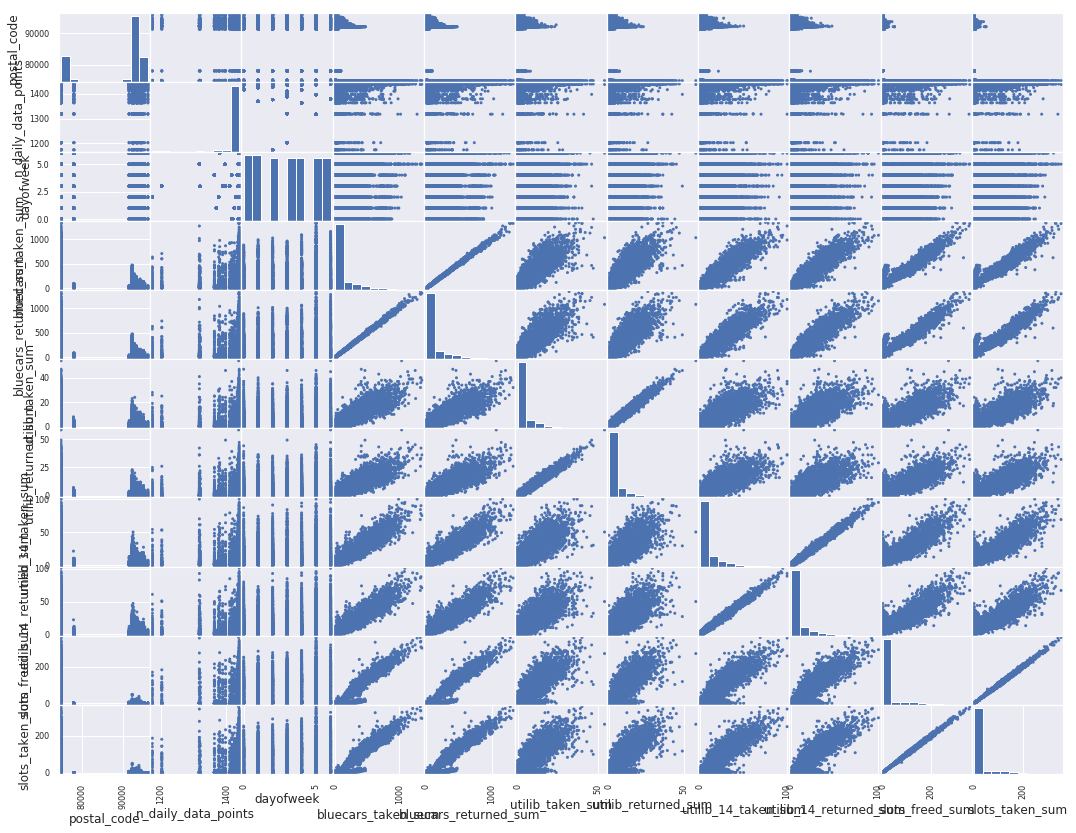

In [0]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set

fig, ax = plt.subplots(figsize=(18,14))
scatter_matrix(auto, alpha=1, ax=ax)
plt.show()

#shows the correlation between all the numeric variables

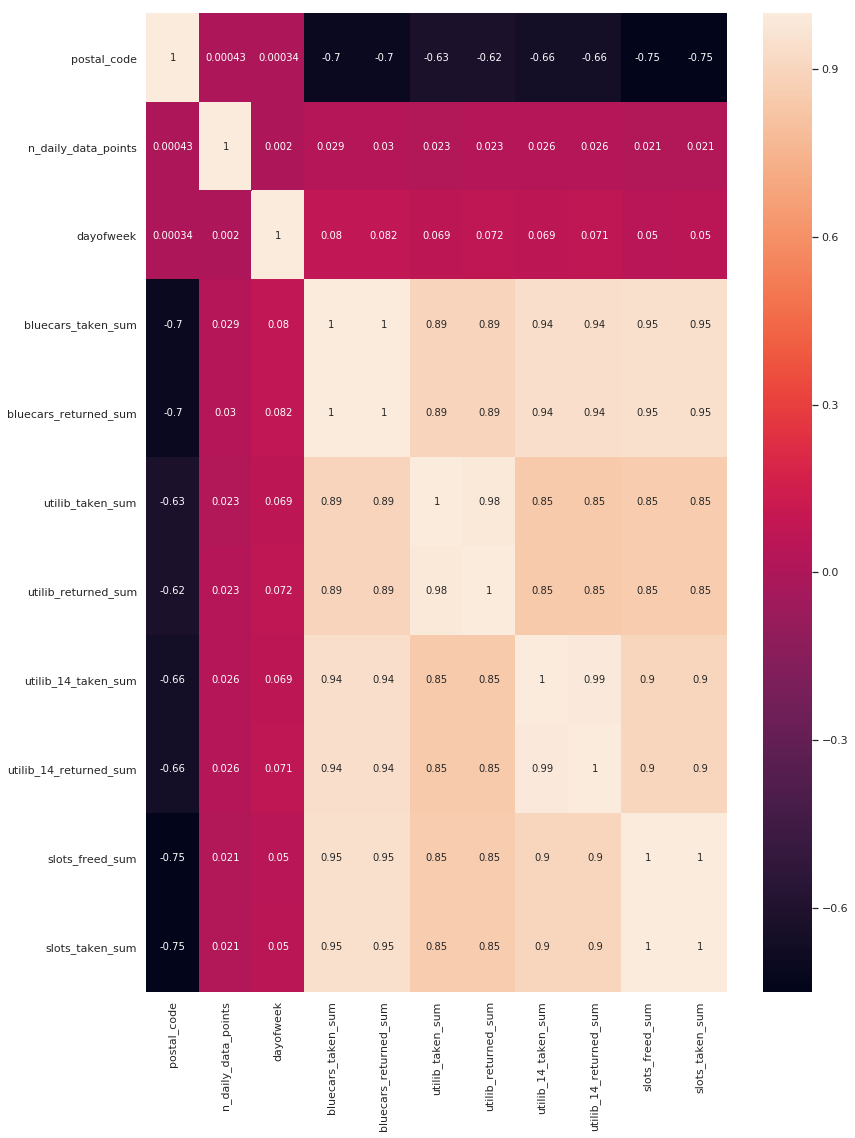

In [0]:
# Checking for correlation among the variables and ploting the summaries and recording our observations

f, ax = plt.subplots(figsize=(13,18))
corr = auto.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True)

#since I am more interested in the usage of the blue cars, I shall focus more on their correlation with other variables.
#there is a very high positive correlation between the blue cars taken and blue cars returned in relation to the other variables.
#this shows that there variables are moving in the same direction

In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [0]:
#With the focus being on the blue cars, I shall focus more on the blue cars returned and taken
#the rest of the columns I shall drop

auto.drop(['utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum','slots_freed_sum', 'slots_taken_sum'],
          axis = 1, inplace = True)

In [0]:
#confirming the columns have been dropped
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

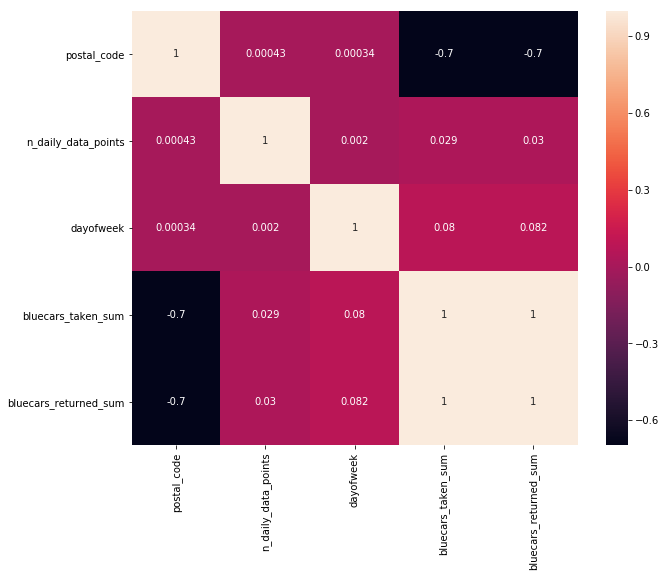

In [0]:
# Checking for correlation among the variables and ploting the summaries and recording our observations

f, ax = plt.subplots(figsize=(10,8))
corr = auto.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True)

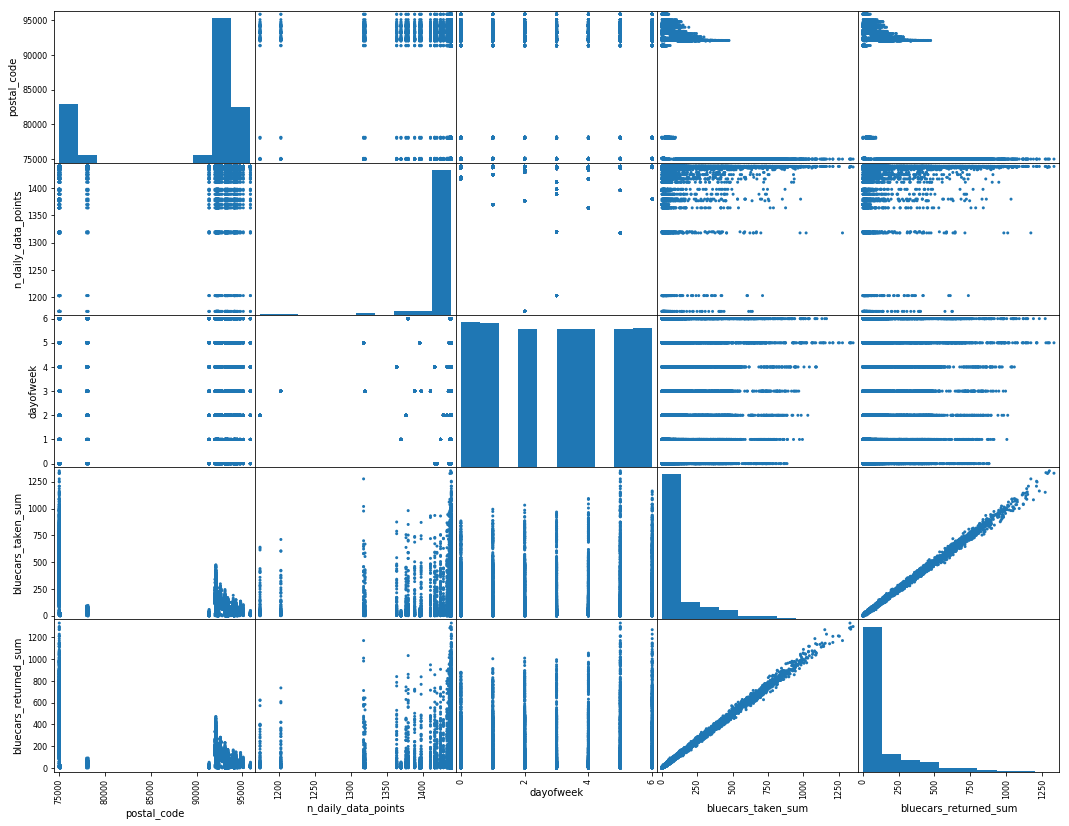

In [0]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set

fig, ax = plt.subplots(figsize=(18,14))
scatter_matrix(auto, alpha=1, ax=ax)
plt.show()


In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

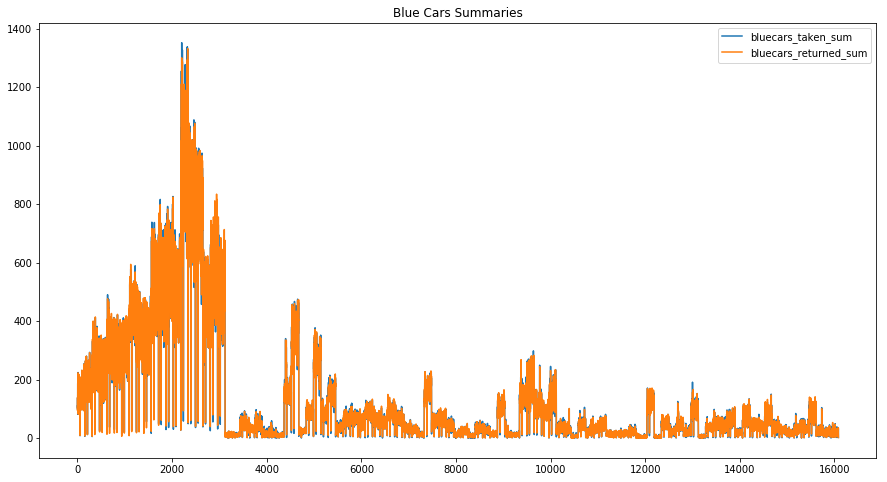

In [0]:

# get columns to plot
columns = auto.columns.drop(['postal_code','date','n_daily_data_points','day_type','dayofweek'])
# create x data
x_data = range(0, auto.shape[0])
# create figure and axis
fig, ax = plt.subplots(figsize= (15,8))
# plot each column
for column in columns:
    ax.plot(x_data, auto[column])
# set title and legend
ax.set_title('Blue Cars Summaries')
ax.legend()

#the summaries of the data between the blue cars taken and blue cars returned seem to fall under a similar trend

# Multivariate Analysis

In [0]:
auto.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
date,,,,,,,
2018-01-01,75001,2018-01-01,1440,0,weekday,110,103
2018-01-02,75001,2018-01-02,1438,1,weekday,98,94
2018-01-03,75001,2018-01-03,1439,2,weekday,138,139
2018-01-04,75001,2018-01-04,1320,3,weekday,104,104
2018-01-05,75001,2018-01-05,1440,4,weekday,114,117


In [0]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

In [0]:
#creating a new dataframe  lib to not include date as the index column so as to carry out reduction and regression
cols = ['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type','bluecars_taken_sum', 'bluecars_returned_sum']

lib = auto[cols]

#converting the new formed dataframe to csv
lib.to_csv('lib.csv')

#reading the new dataset
lib = pd.read_csv('lib.csv', index_col = False)



In [124]:
#previewing the data set lib
lib.head()

,date,postal_code,date.1,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,2018-01-01,75001,2018-01-01,1440,0,weekday,110,103
1,2018-01-02,75001,2018-01-02,1438,1,weekday,98,94
2,2018-01-03,75001,2018-01-03,1439,2,weekday,138,139
3,2018-01-04,75001,2018-01-04,1320,3,weekday,104,104
4,2018-01-05,75001,2018-01-05,1440,4,weekday,114,117


In [0]:
#dropping the date column since i have two after creating the date column as index in my previous dataset auto

lib.drop(['date'], axis = 1, inplace = True)

In [0]:
#previewing the first records in the data set and checking to see the column date is dropped
lib.head()

,postal_code,date.1,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,2018-01-01,1440,0,weekday,110,103
1,75001,2018-01-02,1438,1,weekday,98,94
2,75001,2018-01-03,1439,2,weekday,138,139
3,75001,2018-01-04,1320,3,weekday,104,104
4,75001,2018-01-05,1440,4,weekday,114,117


In [0]:
#renaming the column date.1 to date for uniformity in the dataset
lib.rename(columns = {'date.1':'date'}, inplace = True)

In [127]:
#checking the unique values in the day type column
lib.day_type.unique()

array(['weekday', 'weekend'], dtype=object)

In [0]:
##the column day type has weekday and weekend values. Converting the columns to numerical category will ease in analysis 
#of the data set. The values in the column will be converted with weekday and weekend values to 0 or 1

lib['day_type'] = lib.day_type.map({'weekday':0, 'weekend':1})

In [0]:
#checking to see the changes have been effected
lib.day_type.unique()

array([0, 1])

In [0]:
lib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

In [0]:
#converting the postal code and dayofweek to categorical data type

lib['postal_code'] = lib['postal_code'].astype('category')
lib['dayofweek'] = lib['dayofweek'].astype('category')

#converting the date column to datetime datatype
lib['date'] = pd.to_datetime(lib['date'])

In [130]:
#checking to confirm the changes have been effected
lib.dtypes

postal_code                    category
date                     datetime64[ns]
n_daily_data_points               int64
dayofweek                      category
day_type                          int64
bluecars_taken_sum                int64
bluecars_returned_sum             int64
dtype: object

## Testing for normality
This shall be done using a qq plot

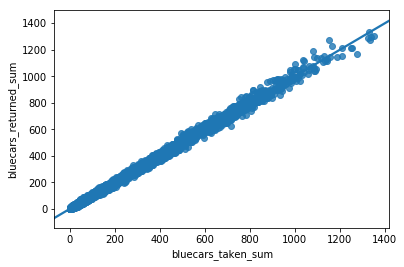

In [131]:
#plotting the qq plot
sns.regplot(lib['bluecars_taken_sum'],lib['bluecars_returned_sum'])
plt.show()

From the graph it shows that the data of the blue cars is normaly distributed as the data points fall on the line if best fit.

In [134]:
#formal test on normality
bluecars = stats.shapiro(lib.bluecars_taken_sum)
print(bluecars)
rbluecars = stats.shapiro(lib.bluecars_returned_sum)
print(rbluecars)

(0.661232590675354, 0.0)
(0.6598013639450073, 0.0)


There is no significant p value and that is to mean that the data is normally distributed

## Multiple Regression
Multiple regression is necessary for encapsulating the effect of multiple features.

In [0]:
#importing the necesary libraries for the model
#i shall use the OLS regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
#Creating features for my model
X = lib.drop(['date', 'postal_code'], axis =1)
#setting the postal code as my target
y = lib['postal_code'].astype('int')
#standardizing the x values
X1 =pd.get_dummies(X)
sc = StandardScaler()
#fit the values in the model after standardizing
X = sc.fit_transform(X1)

In [162]:
#instantiating and fitting the model and the printing the results summary
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            postal_code   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1727.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:58:35   Log-Likelihood:            -1.6122e+05
No. Observations:               16085   AIC:                         3.225e+05
Df Residuals:                   16075   BIC:                         3.225e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.879e+04     43.006   2064.631      0.0

There is no significant value and hence there exists a strong relationship between the variables. The R-squared: 0.492, meaning our model will predict with a 49.2% accuracy level

In [163]:
print(model.predict())

[88980. 89228. 88284. ... 92096. 91776. 91636.]


In [164]:
#using the formula method to challenge the results above
#formula to predict the model excluding the postal code and date column
f_model = smf.ols(formula = 'y ~n_daily_data_points+ dayofweek + day_type+bluecars_taken_sum+bluecars_returned_sum', 
              data=lib)
f_lin_reg = f_model.fit()
f_lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1728.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:06:37   Log-Likelihood:            -1.6121e+05
No. Observations:               16085   AIC:                         3.224e+05
Df Residuals:                   16075   BIC:                         3.225e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               8.58e+04   1907.958     44.969      0.000    8.21e+04    8.95e+04
dayofweek[T.1]          -19.2143    158.572     -0.121      0.904    -330.033     291.605
dayofweek[T.2]          171.4219    161.220      1.063      0.288    -144.588     487.432
dayofweek[T.3]          219.9171    162.383      1.354      0.176     -98.372     538.206
dayofweek[T.4]          463.3235    160.315      2.890      0.004     149.088     777.559
dayofweek[T.5]          526.0893     93.702      5.614      0.000     342.423     709.756
dayofweek[T.6]          259.8924     93.624      2.776      0.006      76.380     443.405
n_daily_data_points       4.3322      1.325      3.269      0.001       1.735       6.929
day_type                785.9816     92.353      8.511      0.000     604.959     967.004
bluecars_taken_sum      -20.3638      4.521     -4.505      0.000     -29.225     -11.503
bluecars_returned_sum    -8.6910      4.520     -1.923      0.055     -17.550       0.168
==============================================================================
Omnibus:                     3874.869   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7964.983
Skew:                          -1.436   Prob(JB):                         0.00
Kurtosis:                       4.906   Cond. No.                     1.42e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.67e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

There are p values with significance levels of above 0.05, to mean they may not be statistically significant. I shall ignore the formula for calculating the regression and use the above calculated values.

# Sampling
Cluster sampling is a sampling technique in which the population is divided into various sections, called clusters. Instead of selecting the whole population, cluster sampling enables us to get data by breaking it down into smaller, more effective groups.
I shall use cluster samplping technique so as to divide my sample into clusters: Blue cars returned and Blue cars taken.

In [166]:
lib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum'],
      dtype='object')

<function matplotlib.pyplot.show>

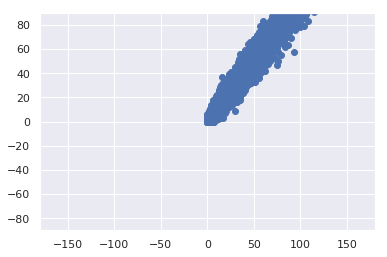

In [183]:
# Create a scatter plot using the bluecars_taken_sum(x) and bluecars_returned_sum(y)
plt.scatter(lib['bluecars_returned_sum'],lib['bluecars_taken_sum'])
# Set limits of the axes
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [184]:
x = lib.iloc[:, 5:7]

# Check if we got the 1 and 2 column
x.tail()

,bluecars_taken_sum,bluecars_returned_sum
16080,15,10
16081,19,19
16082,33,35
16083,11,14
16084,2,2


## Clustering

In [185]:
kmeans = KMeans(2)

# Clustering itself happens using the fit method like this.Here, we are calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering Results

In [186]:
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [187]:
# Create a copy of the data
data_with_clusters = lib.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters.tail(50)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,Cluster
16035,95880,2018-04-20,1417,4,0,10,8,0
16036,95880,2018-04-21,1440,5,1,37,33,0
16037,95880,2018-04-22,1440,6,1,19,18,0
16038,95880,2018-04-23,1417,0,0,12,16,0
16039,95880,2018-04-24,1439,1,0,17,19,0
16040,95880,2018-04-25,1440,2,0,2,4,0
16041,95880,2018-04-26,1440,3,0,13,13,0
16042,95880,2018-04-27,1440,4,0,16,11,0
16043,95880,2018-04-28,1440,5,1,15,17,0
16044,95880,2018-04-29,1440,6,1,30,26,0


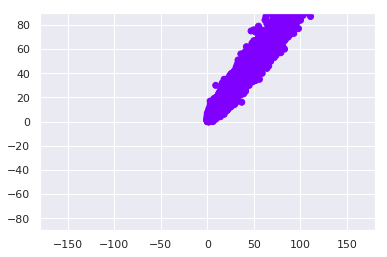

In [188]:
plt.scatter(data_with_clusters['bluecars_taken_sum'],data_with_clusters['bluecars_returned_sum'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()